# Exploratory Data Analysis (EDA) for ceo tweets

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import uniform


from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ceo_tweets = pd.read_csv('/content/drive/MyDrive/Data Cleaning/cleaned_ceo_tweets_with_tokens.csv')

In [5]:
df_all_ceo = ceo_tweets.copy()
df_all_ceo

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,Yup,['yup']
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629,Most news outlets attempt to answer the questi...,"['news', 'outlet', 'attempt', 'answer', 'quest..."
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going...,828,9829,So hard to find out whats going on in the worl...,"['hard', 'find', 'out', 'whats', 'going', 'wor..."
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negati...",420,4962,True careless negativity destruction is much h...,"['true', 'careless', 'negativity', 'destructio..."
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,"['sadly', 'true']"
...,...,...,...,...,...,...,...,...
5683,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,"['happy', 'new', 'year']"
5684,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesom...",0,2,enjoying d browsing with Chrome it is awesome,"['enjoying', 'browsing', 'chrome', 'awesome']"
5685,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering again,"['thinking', 'abt', 'twittering']"
5686,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out al...,1,5,enjoying a rainy day in beijing clears out all...,"['enjoying', 'rainy', 'day', 'beijing', 'clear..."


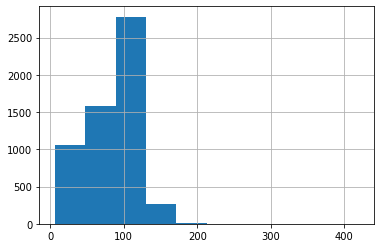

In [6]:
df_all_ceo['tokens'].str.len().hist()

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    stop.add("RT")
    stop.add("amp")
    stop.add("new")
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

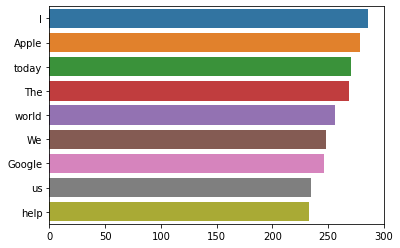

In [9]:
plot_top_non_stopwords_barchart(ceo_tweets['cleaned_tweets'])

# Polarities for each CEO (Using TextBlob)

In [10]:
ceo_tweets.head(1)

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,Yup,['yup']


In [11]:
from textblob import TextBlob
ceo_tweets['polarity']=ceo_tweets['tokens'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [12]:
ceo_tweets.head(2)

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,polarity
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,Yup,['yup'],0.0
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629,Most news outlets attempt to answer the questi...,"['news', 'outlet', 'attempt', 'answer', 'quest...",-0.5


In [13]:
polarity_sorted=pd.DataFrame(ceo_tweets.groupby('username')['polarity'].mean().sort_values(ascending=True))


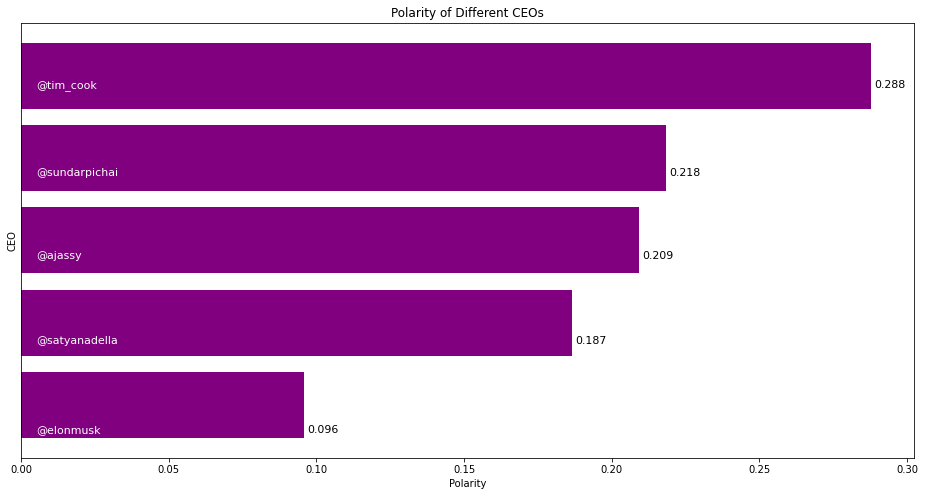

In [14]:
plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('CEO')
plt.title('Polarity of Different CEOs')
polarity_graph=plt.barh(np.arange(len(polarity_sorted.index)),polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

From the chart above, we can see that Tim Cook (Apple CEO) commands the highest average polarity scores from his tweets, whereas Elon Musk (Tesla CEO) has the lowest average polarity scores out of the 5 CEOs.

## Tesla CEO (Elon Musk) Sentiment Distribution

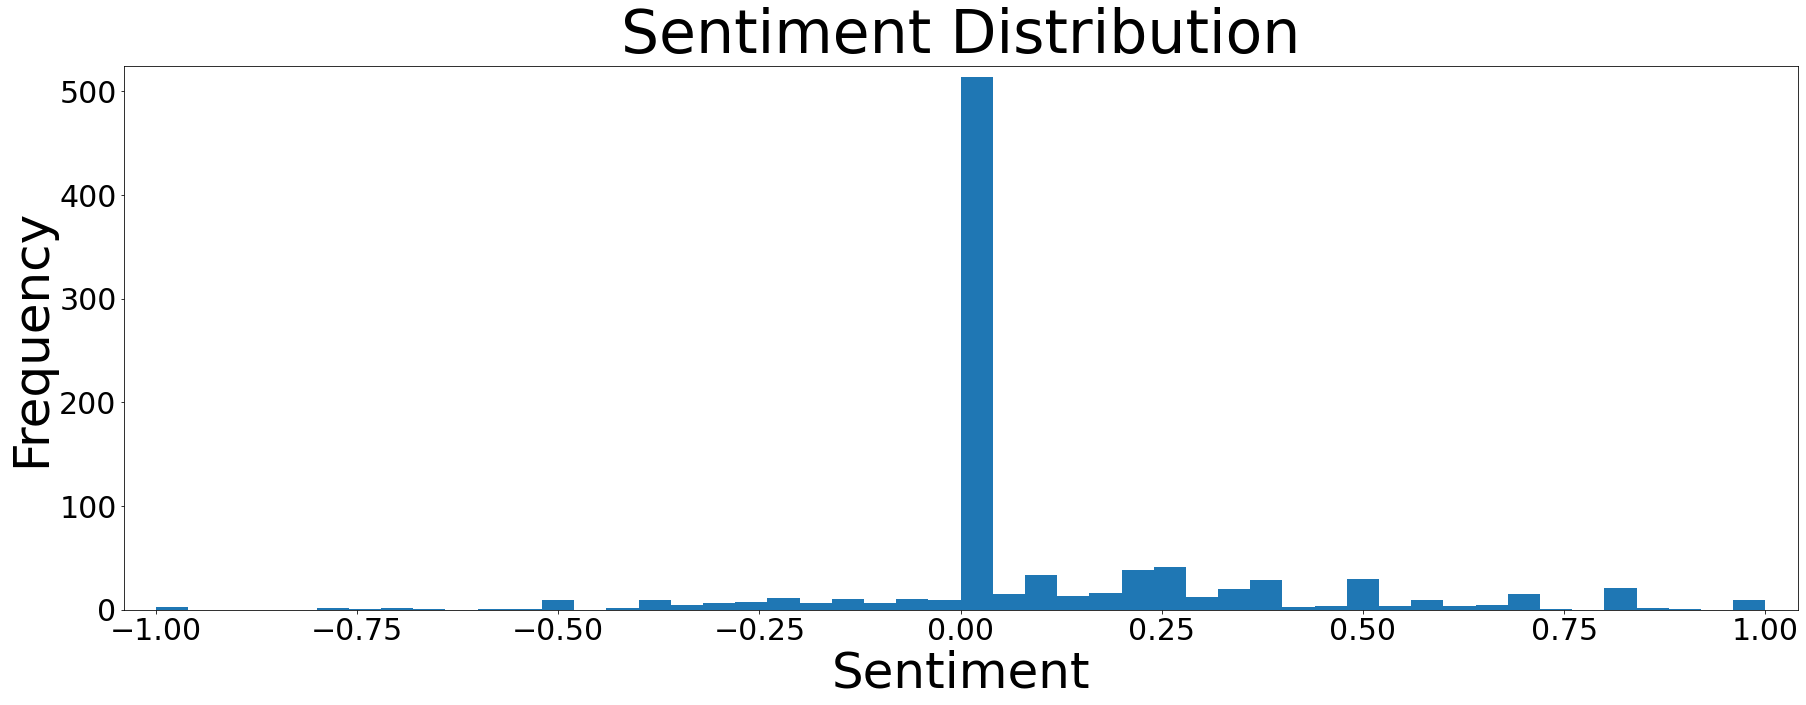

In [15]:
plt.figure(figsize=(30,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=30)
plt.hist(ceo_tweets[ceo_tweets['username'] == '@elonmusk']['polarity'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

## Amazon CEO (ajassy) Sentiment Distribution

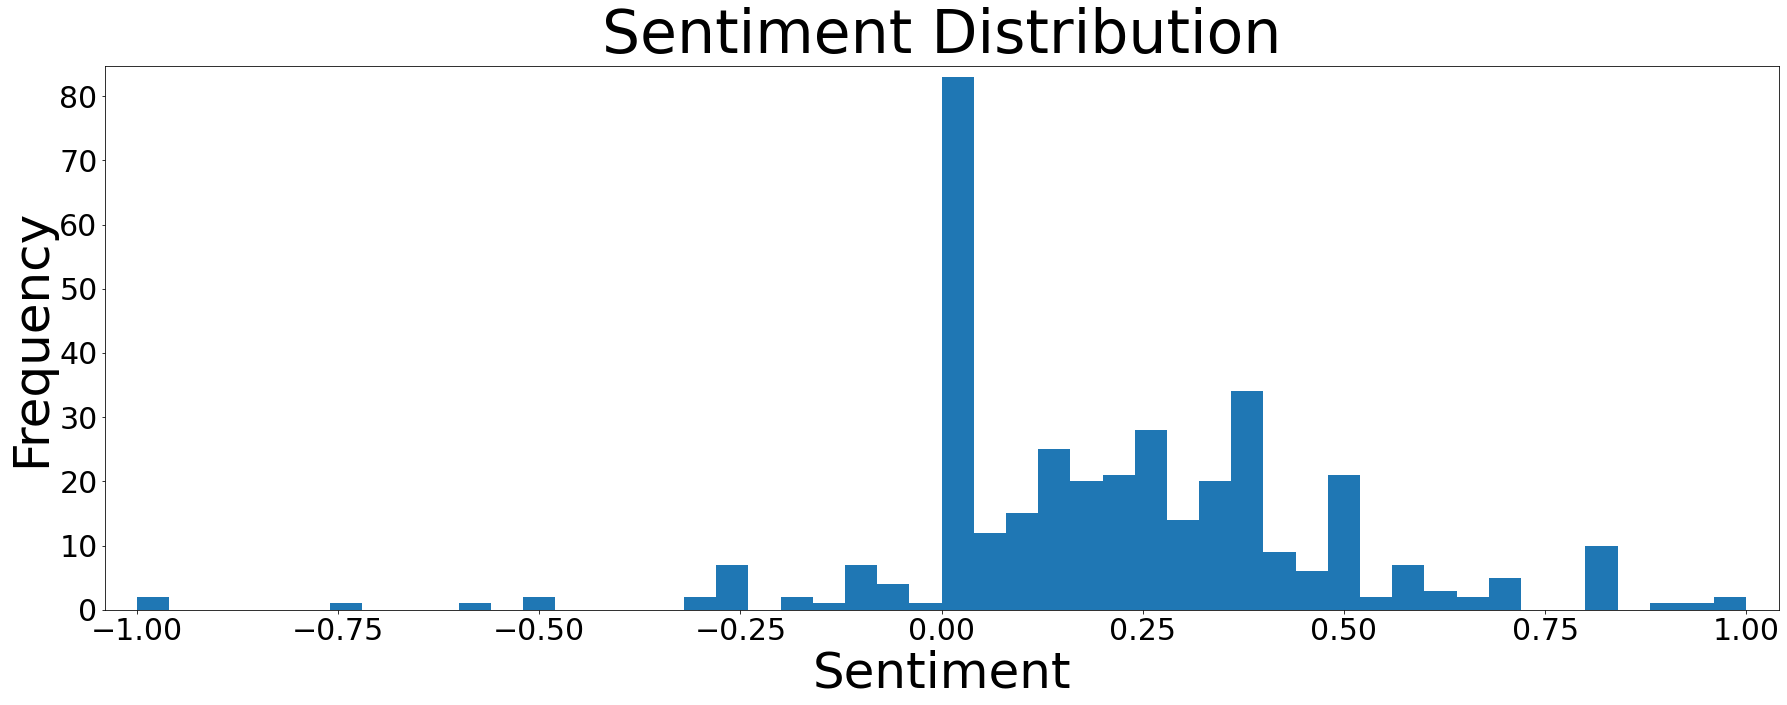

In [16]:
plt.figure(figsize=(30,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=30)
plt.hist(ceo_tweets[ceo_tweets['username'] == '@ajassy']['polarity'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

## Apple CEO (Tim Cook) Sentiment Distribution

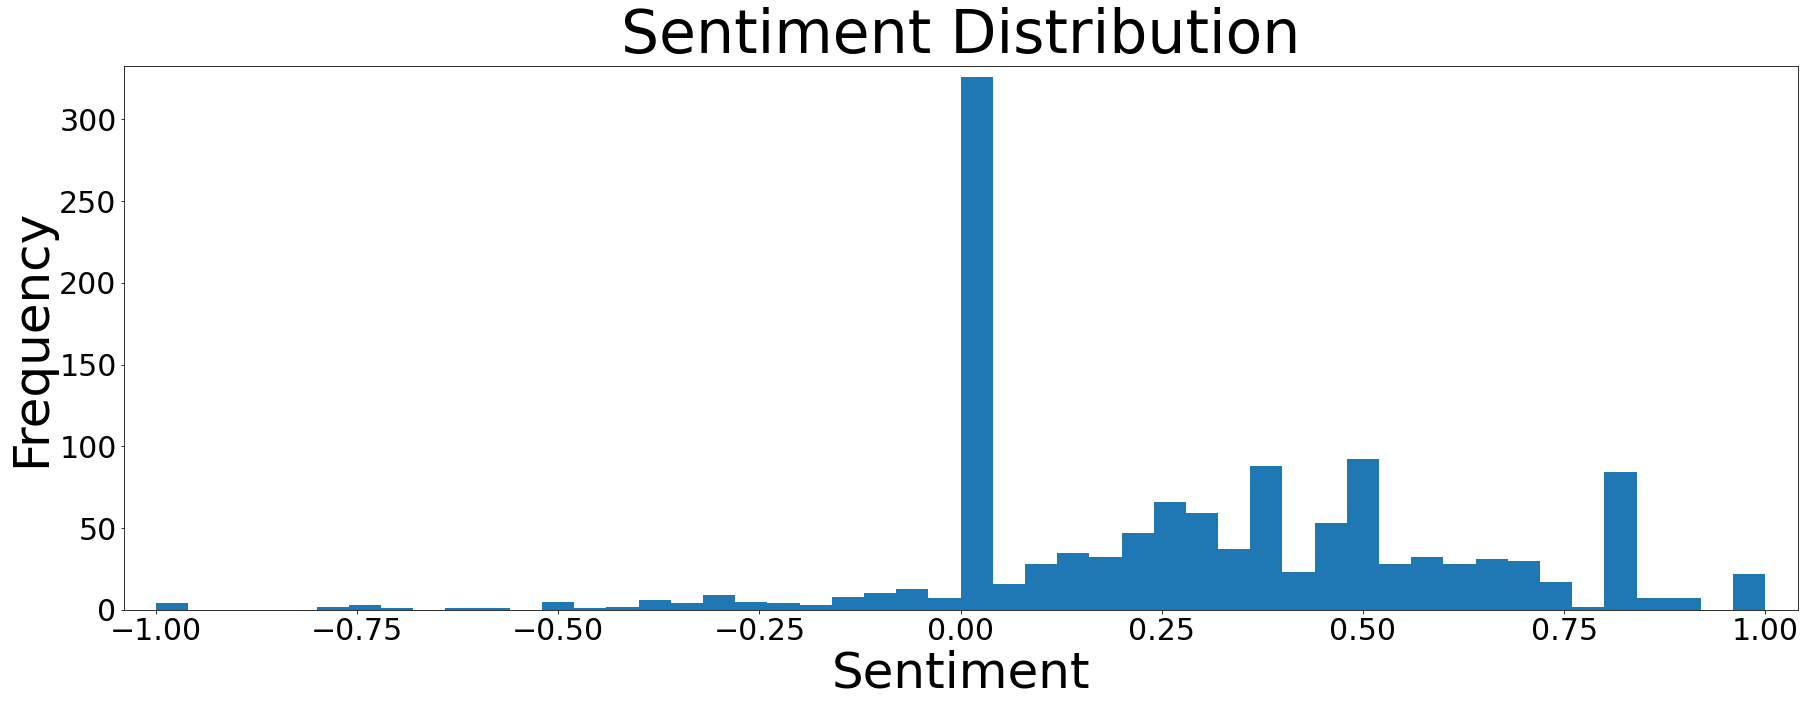

In [17]:
plt.figure(figsize=(30,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=30)
plt.hist(ceo_tweets[ceo_tweets['username'] == '@tim_cook']['polarity'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

## Microsoft CEO (satyanadella) Sentiment Distribution

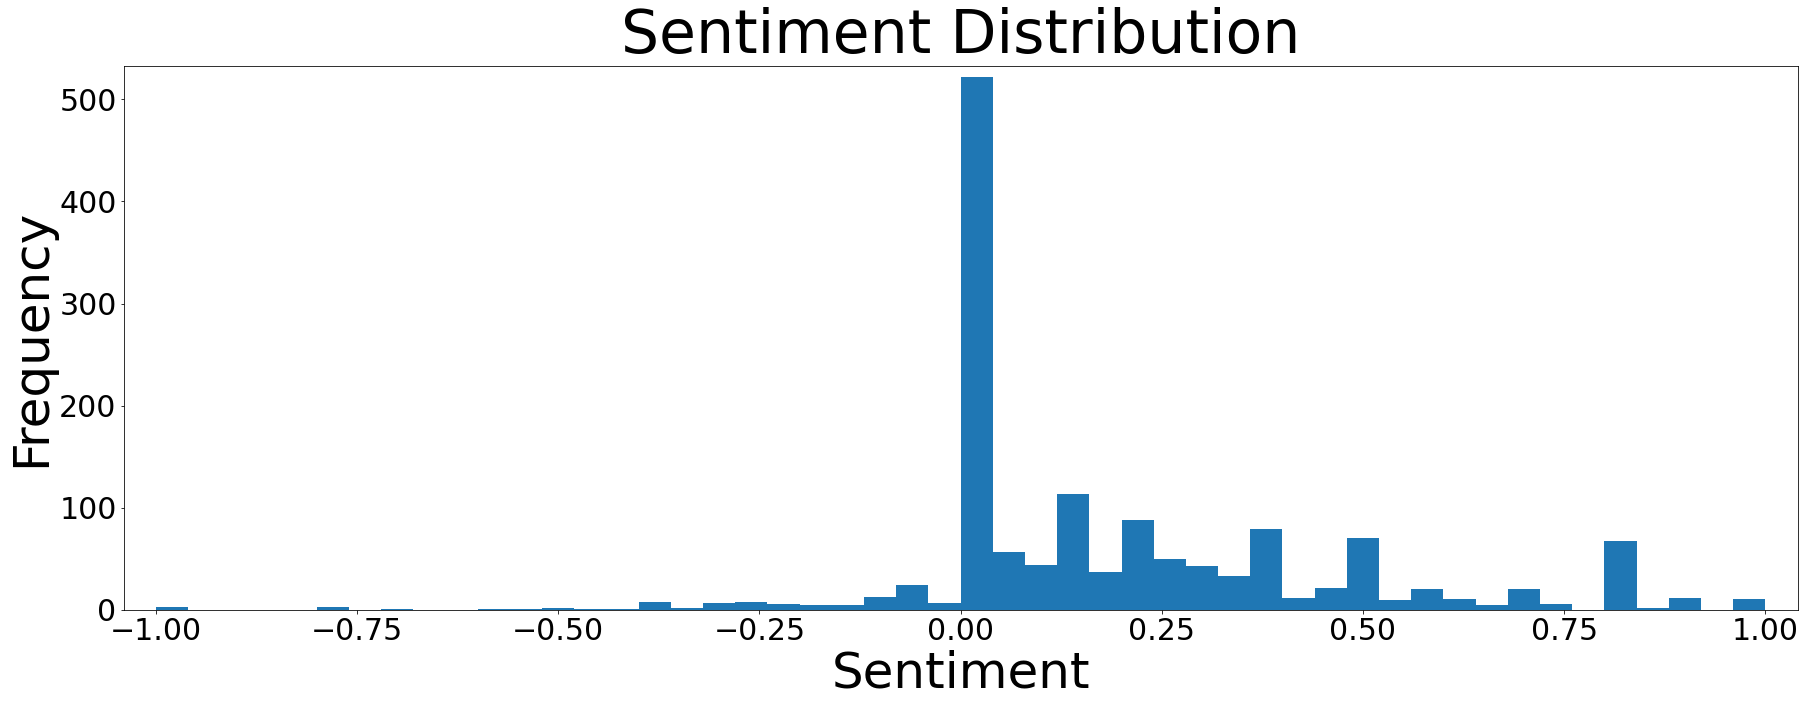

In [18]:
plt.figure(figsize=(30,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=30)
plt.hist(ceo_tweets[ceo_tweets['username'] == '@satyanadella']['polarity'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

## Google CEO (Sundar Pichai) Sentiment Distribution

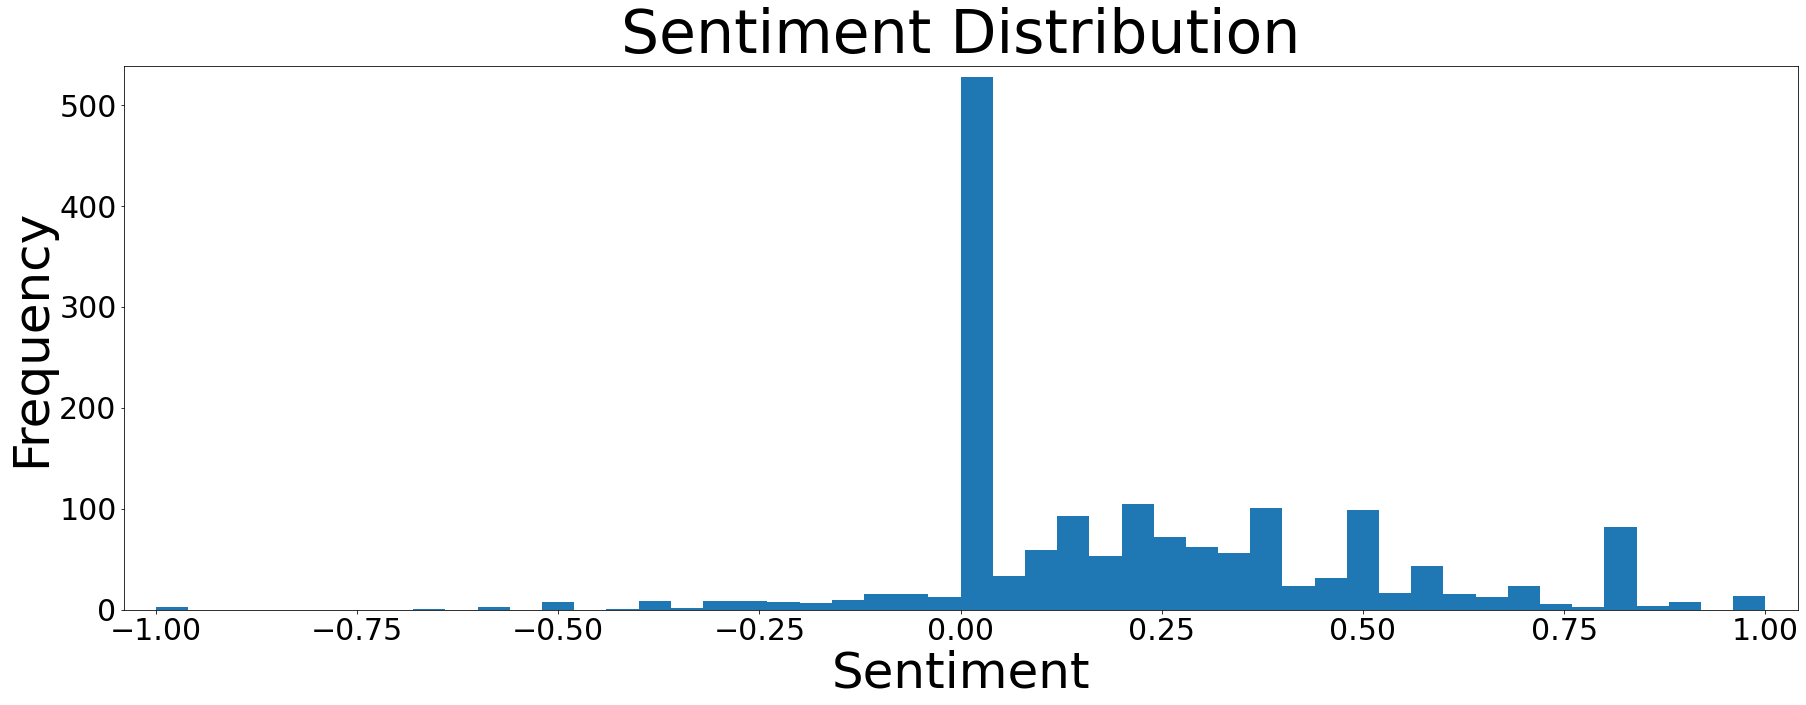

In [19]:
plt.figure(figsize=(30,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=30)
plt.hist(ceo_tweets[ceo_tweets['username'] == '@sundarpichai']['polarity'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()